<a href="https://colab.research.google.com/github/RubaEgbaria/Association-Data-Mining/blob/master/Assignment_Two_Data_Mining_Association_Rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ruba Egbaria - 12457003
# Assignment Two - Data Mining Association Rule.

# Load Data and Preprocess

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

data = pd.read_csv('Spam_SMS.csv')
data.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# each message to set of words
data['Message_Tokens'] = data['Message'].str.split()
transactions = data.apply(lambda row: row['Message_Tokens'] + [row['Class']], axis=1).tolist()

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions).astype(int)
df_binary = pd.DataFrame(te_array, columns=te.columns_, index=data['Class'])
df_binary.head()

,!,!!,!!!,!!!!,!!''.,!1,!:-),!This,"""",""".",...,ü?,–,‘MORROW.,‘rents,“,“Harry,“It's,…,….,…Thanks
Class,,,,,,,,,,,,,,,,,,,,,
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
spam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_binary.index.unique()

Index(['ham', 'spam'], dtype='object', name='Class')

# Apriori Algorithm

In [12]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# Apriori algorithm
frequent_itemsets_apriori = apriori(df_binary, min_support=0.01, use_colnames=True)

# rules
rules_apriori_lift = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=0.0, num_itemsets=100)

filtered_rules = rules_apriori_lift
filtered_rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(spam),(&),0.134015,0.016146,0.013994,0.104418,6.466934,1.0,0.011830,1.098563,0.976192,0.102767,0.089720,0.485542
1,(&),(spam),0.016146,0.134015,0.013994,0.866667,6.466934,1.0,0.011830,6.494887,0.859241,0.102767,0.846033,0.485542
2,(ham),(&amp;),0.865985,0.012020,0.012020,0.013880,1.154755,1.0,0.001611,1.001886,1.000000,0.013880,0.001883,0.506940
3,(&amp;),(ham),0.012020,0.865985,0.012020,1.000000,1.154755,1.0,0.001611,inf,0.135646,0.013880,1.000000,0.506940
4,(I),(&lt;#&gt;),0.202368,0.038393,0.011123,0.054965,1.431646,1.0,0.003354,1.017536,0.377998,0.048437,0.017234,0.172342


In [13]:
filtered_rules['confidence'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,confidence
count,5078.000000
mean,0.267636
std,0.266050
min,0.011601
25%,0.073424
50%,0.169566
75%,0.358200
max,1.000000


In [14]:
conf_threshold = filtered_rules['confidence'].mean()
print("Confidence Threshold is the mean which is")
print(conf_threshold)

Confidence Threshold is the quantile 0.7 which is
0.3127314814814814


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
filtered_rules['lift'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,lift
count,5078.000000
mean,1.807651
std,0.810419
min,0.485438
25%,1.169514
50%,1.661401
75%,2.166450
max,10.275308


In [16]:
lift_threshold = filtered_rules['lift'].mean()
print("Lift Threshold is the mean which is")
print(lift_threshold)

Lift Threshold is the quantile 0.7 which is
2.0471571824906123


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
support_threshold = filtered_rules['support'].mean()
print("Support Threshold is the mean which is")
print(support_threshold)

Support Threshold is the mean which is
0.016682416661049238


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# high confidence only
strong_rules_apriori = filtered_rules[(filtered_rules['confidence'] > conf_threshold) & (filtered_rules['lift'] > lift_threshold) & (filtered_rules['support'] > support_threshold)]
strong_rules_apriori.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
35,(2),(spam),0.066738,0.134015,0.023323,0.349462,2.607635,1.0,0.014379,1.331183,0.660598,0.131446,0.248789,0.261746
69,(Call),(spam),0.027449,0.134015,0.024040,0.875817,6.535213,1.0,0.020362,6.973458,0.870888,0.174935,0.856599,0.527601
96,(am),(I),0.032113,0.202368,0.019376,0.603352,2.981457,1.0,0.012877,2.010931,0.686644,0.090075,0.502718,0.349548
139,(know),(I),0.038034,0.202368,0.018479,0.485849,2.400818,1.0,0.010782,1.551357,0.606544,0.083266,0.355403,0.288581
281,(have),(a),0.078938,0.197883,0.034804,0.440909,2.228130,1.0,0.019184,1.434681,0.598432,0.143810,0.302981,0.308397


In [19]:
# that you get at least 80-100 strong rules (e.g., rules with high lift and confidence which at the same time have
# relatively good support).
strong_rules_apriori[['antecedents', 'consequents']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents
35,(2),(spam)
69,(Call),(spam)
96,(am),(I)
139,(know),(I)
281,(have),(a)
...,...,...
4617,"(and, you)","(to, ham)"
4835,"(to, me, ham)",(you)
4837,"(me, you, ham)",(to)
4838,"(to, me)","(you, ham)"


# FP-Growth Algorithm

In [25]:
# # Generate rules

rules_fpgrowth = fpgrowth(df_binary, min_support=0.01, use_colnames=True)
strong_rules_fpgrowth = association_rules(rules_fpgrowth, metric='lift', min_threshold=0.0, num_itemsets=100)
strong_rules_fpgrowth.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(in),(ham),0.130068,0.865985,0.119842,0.921379,1.063967,1.0,0.007205,1.704578,0.069110,0.136773,0.413344,0.529884
1,(ham),(in),0.865985,0.130068,0.119842,0.138388,1.063967,1.0,0.007205,1.009656,0.448615,0.136773,0.009564,0.529884
2,(to),(in),0.293326,0.130068,0.044851,0.152905,1.175577,1.0,0.006699,1.026959,0.211348,0.118483,0.026252,0.248866
3,(in),(to),0.130068,0.293326,0.044851,0.344828,1.175577,1.0,0.006699,1.078607,0.171685,0.118483,0.072879,0.248866
4,(a),(in),0.197883,0.130068,0.039110,0.197643,1.519532,1.0,0.013372,1.084220,0.426251,0.135404,0.077678,0.249166


In [27]:
conf_threshold = strong_rules_fpgrowth['confidence'].mean()
lift_threshold = strong_rules_fpgrowth['lift'].mean()
support_threshold = strong_rules_fpgrowth['support'].mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# # high confidence and lift only
strong_rules_fpgrowth = strong_rules_fpgrowth[(strong_rules_fpgrowth['confidence'] > conf_threshold) & (strong_rules_fpgrowth['lift'] > lift_threshold) & (strong_rules_fpgrowth['support'] > support_threshold)]
strong_rules_fpgrowth.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
21,"(to, in)",(a),0.044851,0.197883,0.017223,0.384000,1.940540,1.0,0.008348,1.302138,0.507439,0.076372,0.232032,0.235518
30,(in),"(a, ham)",0.130068,0.147112,0.035701,0.274483,1.865813,1.0,0.016567,1.175559,0.533422,0.147845,0.149341,0.258583
46,"(to, in)",(the),0.044851,0.173484,0.018837,0.420000,2.420972,1.0,0.011057,1.425028,0.614504,0.094424,0.298259,0.264292
352,"(to, you)",(a),0.088446,0.197883,0.031755,0.359026,1.814336,1.0,0.014253,1.251404,0.492384,0.124736,0.200898,0.259749
397,"(to, a, ham)",(I),0.051668,0.202368,0.019555,0.378472,1.870216,1.0,0.009099,1.283341,0.490654,0.083397,0.220784,0.237552


In [30]:
strong_rules_fpgrowth[['antecedents', 'consequents']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents
21,"(to, in)",(a)
30,(in),"(a, ham)"
46,"(to, in)",(the)
352,"(to, you)",(a)
397,"(to, a, ham)",(I)
...,...,...
4862,"(to, are)",(you)
4925,"(are, ham)",(you)
4927,(are),"(you, ham)"
5031,(from),(spam)


In [31]:
strong_rules_fpgrowth = strong_rules_fpgrowth[(strong_rules_fpgrowth['confidence'] > (conf_threshold * 1.5))]
strong_rules_fpgrowth[['antecedents', 'consequents']]
# filtered it with even higher conf since the data was wide.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents
46,"(to, in)",(the)
403,"(a, I)","(to, ham)"
439,(spam),(to)
446,"(to, spam)",(a)
448,"(spam, a)",(to)
...,...,...
4848,(are),(you)
4862,"(to, are)",(you)
4925,"(are, ham)",(you)
4927,(are),"(you, ham)"


# Visualize the top 10 items

In [65]:
apriori_rules = strong_rules_apriori.copy()
apriori_rules['rule'] = apriori_rules.apply(
    lambda x: f"{', '.join(list(x['antecedents']))} → {', '.join(list(x['consequents']))}", axis=1
)

# Keep relevant metrics for Apriori rules
apriori_rules = apriori_rules[['rule', 'support', 'confidence', 'lift', 'consequents','antecedents']]

fpgrowth_rules = strong_rules_fpgrowth.copy()

fpgrowth_rules['rule'] = strong_rules_fpgrowth.apply(
    lambda x: f"{', '.join(list(x['antecedents']))} → {', '.join(list(x['consequents']))}", axis=1
)
fpgrowth_rules = fpgrowth_rules[['rule', 'support', 'confidence', 'lift', 'consequents','antecedents']]

apriori_rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rule,support,confidence,lift,consequents,antecedents
35,2 → spam,0.023323,0.349462,2.607635,(spam),(2)
69,Call → spam,0.024040,0.875817,6.535213,(spam),(Call)
96,am → I,0.019376,0.603352,2.981457,(I),(am)
139,know → I,0.018479,0.485849,2.400818,(I),(know)
281,have → a,0.034804,0.440909,2.228130,(a),(have)


In [66]:
import matplotlib.pyplot as plt

# Extract top 10 frequent itemsets for Apriori
top_10_apriori = apriori_rules.sort_values(by='support', ascending=False).head(10)

# Extract top 10 frequent itemsets for FP-Growth
top_10_fpgrowth = fpgrowth_rules.sort_values(by='support', ascending=False).head(10)

# Display the top 10 frequent itemsets for each algorithm
print("Top 10 Popular Items - Apriori:")
print(top_10_apriori)

print("\nTop 10 Popular Items - FP-Growth:")
print(top_10_fpgrowth)


Top 10 Popular Items - Apriori:
                rule   support  confidence      lift consequents antecedents
424        are → you  0.038751    0.588556  2.689025       (you)       (are)
958         of → the  0.036598    0.386364  2.227085       (the)        (of)
281         have → a  0.034804    0.440909  2.228130         (a)      (have)
2061    to, a → spam  0.032831    0.388535  2.899189      (spam)     (to, a)
2060    to, spam → a  0.032831    0.424594  2.145682         (a)  (to, spam)
2062    spam, a → to  0.032831    0.646643  2.204519        (to)   (spam, a)
2421  are, ham → you  0.032113    0.613014  2.800769       (you)  (are, ham)
2423  are → you, ham  0.032113    0.487738  2.526630  (you, ham)       (are)
3183   of, ham → the  0.031934    0.407323  2.347897       (the)   (of, ham)
3185   of → the, ham  0.031934    0.337121  2.305661  (the, ham)        (of)

Top 10 Popular Items - FP-Growth:
                rule   support  confidence      lift consequents antecedents
439      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


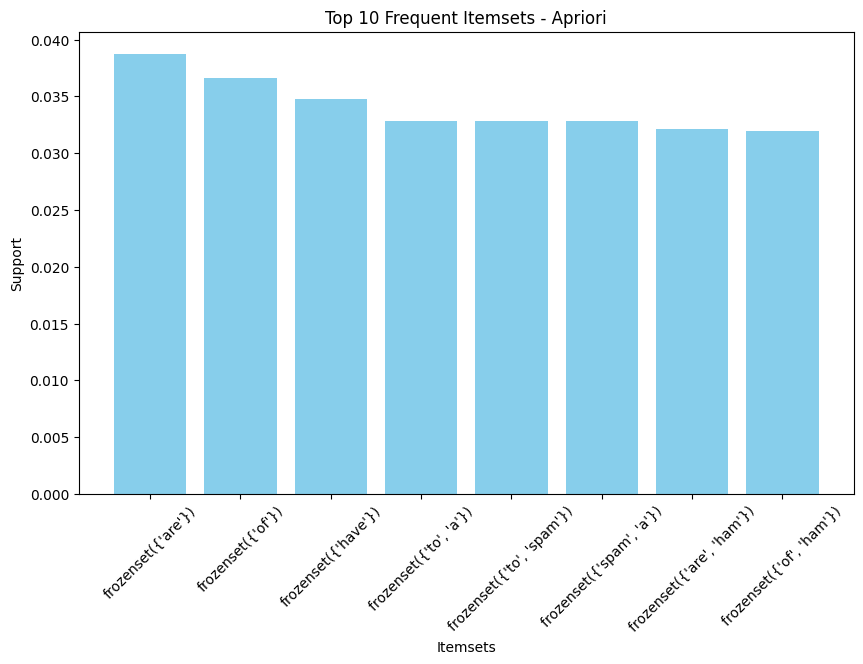

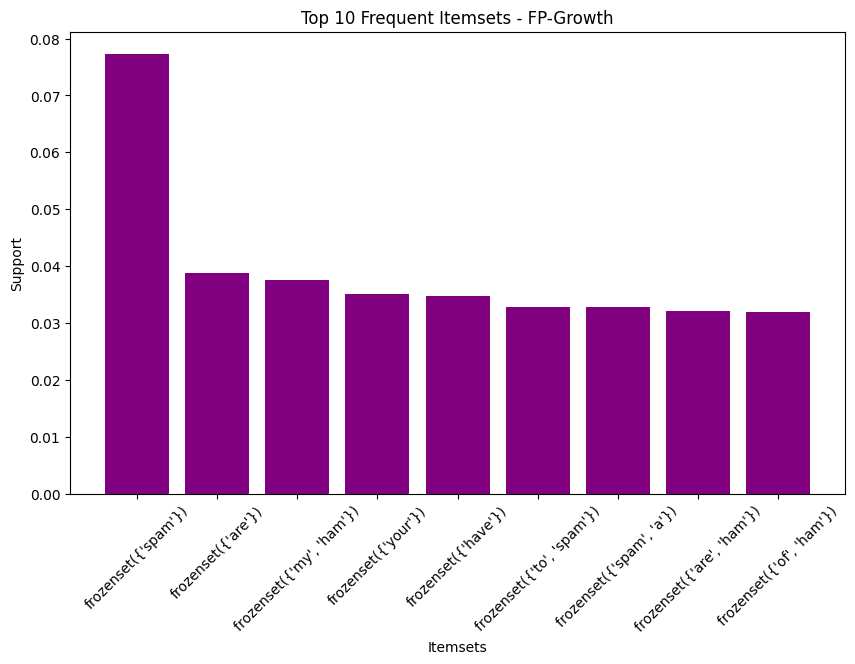

In [68]:
# Visualization for Apriori
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 10})
plt.bar(top_10_apriori['antecedents'].astype(str), top_10_apriori['support'], color='skyblue')
plt.title('Top 10 Frequent Itemsets - Apriori')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.show()

# Visualization for FP-Growth
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 10})
plt.bar(top_10_fpgrowth['antecedents'].astype(str), top_10_fpgrowth['support'], color='purple')
plt.title('Top 10 Frequent Itemsets - FP-Growth')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


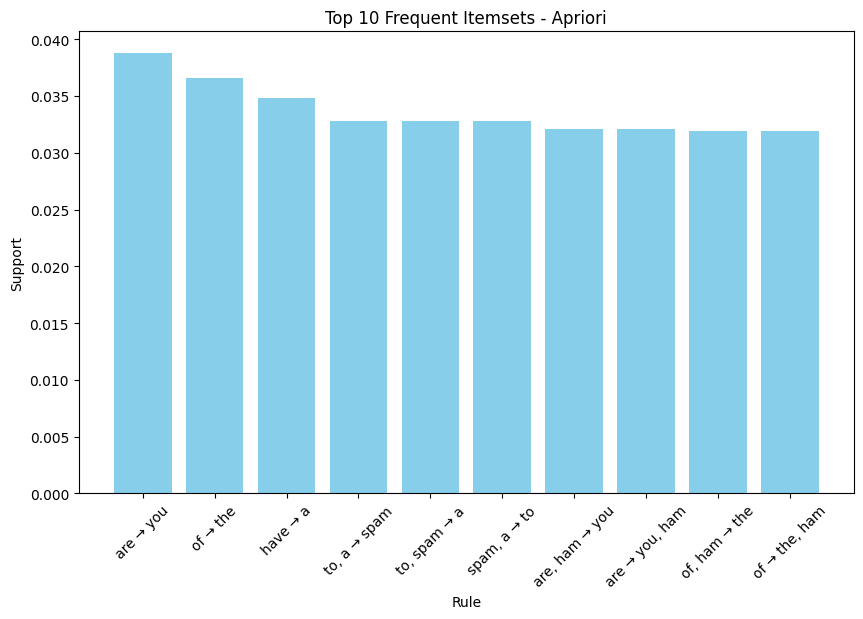

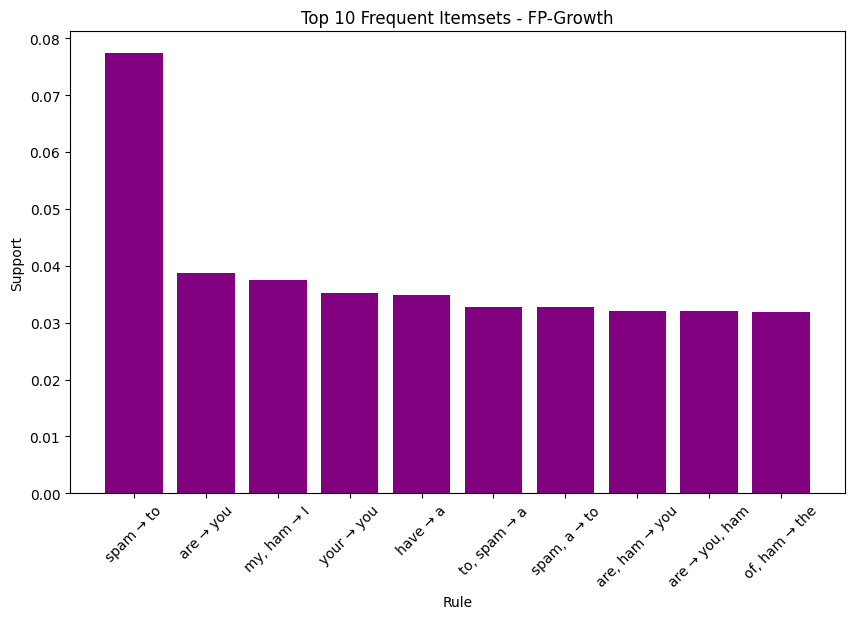

In [67]:
# Visualization for Apriori
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 10})
plt.bar(top_10_apriori['rule'].astype(str), top_10_apriori['support'], color='skyblue')
plt.title('Top 10 Frequent Rules - Apriori')
plt.xlabel('Rule')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.show()

# Visualization for FP-Growth
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 10})
plt.bar(top_10_fpgrowth['rule'].astype(str), top_10_fpgrowth['support'], color='purple')
plt.title('Top 10 Frequent Rules - FP-Growth')
plt.xlabel('Rule')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.show()

#  scatterplot of the rules between support and confidence

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


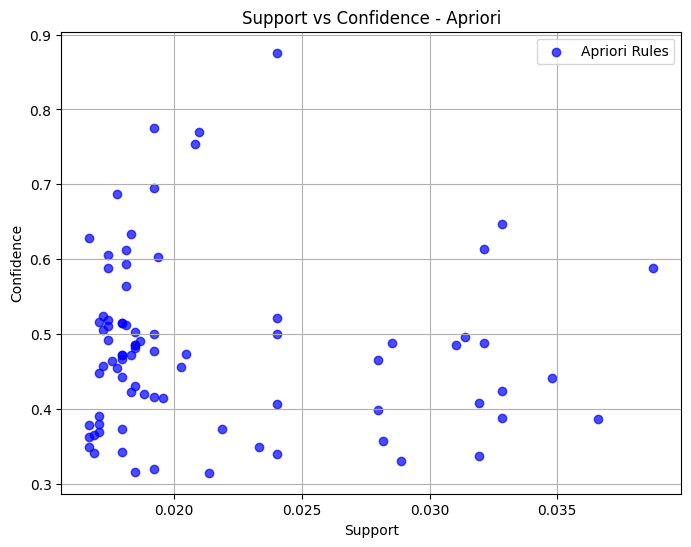

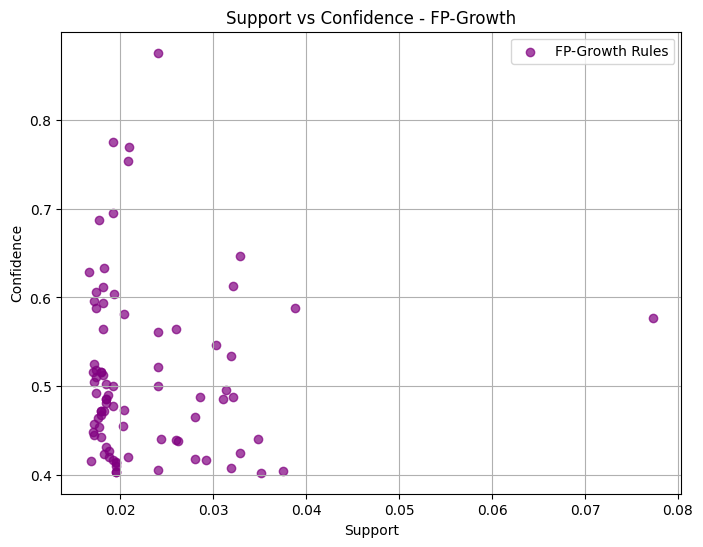

In [70]:
# Scatter plot for Apriori rules
plt.figure(figsize=(8, 6))
plt.scatter(apriori_rules['support'], apriori_rules['confidence'], alpha=0.7, c='blue', label='Apriori Rules')
plt.title('Support vs Confidence - Apriori')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for FP-Growth rules
plt.figure(figsize=(8, 6))
plt.scatter(fpgrowth_rules['support'], fpgrowth_rules['confidence'], alpha=0.7, c='purple', label='FP-Growth Rules')
plt.title('Support vs Confidence - FP-Growth')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend()
plt.grid(True)
plt.show()


# The top 5 most interesting rules

In [95]:
# Filter rules for Apriori
interesting_apriori_rules = apriori_rules[
    apriori_rules['rule'].str.contains('→ ham|→ spam')
]

# Filter rules for FP-Growth
interesting_fpgrowth_rules = fpgrowth_rules[
    fpgrowth_rules['rule'].str.contains('→ ham|→ spam')
]

# Sort by lift and confidence to prioritize
sorted_apriori_rules = interesting_apriori_rules.sort_values(by=['lift', 'confidence', 'support'], ascending=False)
sorted_fpgrowth_rules = interesting_fpgrowth_rules.sort_values(by=['lift', 'confidence', 'support'], ascending=False)

# Select top 5 interesting rules
top_5_apriori_rules = sorted_apriori_rules.head(5)
top_5_fpgrowth_rules = sorted_fpgrowth_rules.head(5)

# Display the selected rules
print("Top 5 Most Interesting Rules based on lift, conf, supp - Apriori:")
print(top_5_apriori_rules)

print("\nTop 5 Most Interesting Rules based on lift, conf, supp - FP-Growth:")
print(top_5_fpgrowth_rules)


Top 5 Most Interesting Rules based on lift, conf, supp - Apriori:
                 rule   support  confidence      lift consequents antecedents  \
69        Call → spam  0.024040    0.875817  6.535213      (spam)      (Call)   
978         or → spam  0.031396    0.495751  3.699216      (spam)        (or)   
486       call → spam  0.031037    0.485955  3.626122      (spam)      (call)   
563       from → spam  0.020273    0.455645  3.399955      (spam)      (from)   
3597  to, your → spam  0.018299    0.423237  3.158126      (spam)  (to, your)   

         score  
69    0.137598  
978   0.057576  
486   0.054691  
563   0.031406  
3597  0.024459  

Top 5 Most Interesting Rules based on lift, conf, supp - FP-Growth:
                 rule   support  confidence      lift consequents antecedents  \
3105      Call → spam  0.024040    0.875817  6.535213      (spam)      (Call)   
3060        or → spam  0.031396    0.495751  3.699216      (spam)        (or)   
2712      call → spam  0.031037  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
# Calculate the score for Apriori rules (support * lift * confidence)
top_5_apriori_rules['score'] = (
    top_5_apriori_rules['lift'] * top_5_apriori_rules['confidence'] * top_5_apriori_rules['support'])

top_5_fpgrowth_rules['score'] = (
    top_5_fpgrowth_rules['lift'] * top_5_fpgrowth_rules['confidence'] * top_5_fpgrowth_rules['support'])

# Print for Apriori
print("Top 5 Interesting Rules for Apriori (Based on Highest Score):")
print(top_5_apriori_rules)

# FP-Growth
print("Top 5 Interesting Rules for FP-Growth (Based on Highest Score):")
print(top_5_fpgrowth_rules)

Top 5 Interesting Rules for Apriori (Based on Highest Score):
                 rule   support  confidence      lift consequents antecedents  \
69        Call → spam  0.024040    0.875817  6.535213      (spam)      (Call)   
978         or → spam  0.031396    0.495751  3.699216      (spam)        (or)   
486       call → spam  0.031037    0.485955  3.626122      (spam)      (call)   
563       from → spam  0.020273    0.455645  3.399955      (spam)      (from)   
3597  to, your → spam  0.018299    0.423237  3.158126      (spam)  (to, your)   

         score  
69    0.137598  
978   0.057576  
486   0.054691  
563   0.031406  
3597  0.024459  
Top 5 Interesting Rules for FP-Growth (Based on Highest Score):
                 rule   support  confidence      lift consequents antecedents  \
3105      Call → spam  0.024040    0.875817  6.535213      (spam)      (Call)   
3060        or → spam  0.031396    0.495751  3.699216      (spam)        (or)   
2712      call → spam  0.031037    0.48595

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-96-cd58c64b6358>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_apriori_rules['score'] = (
